# Getting Started with Daft

One of the important thing we need to manage in this new causal framework is the causal graph.  Being able to effectively visualize and maintain a causul graph is important.  DoWhy works well with two different graphing languages and can visualize with matplotlib or graphviz.  Unfortunately, I find graphviz super unreliable when working from Windows, which leaves matplotlib.  The built-in visual in matplotlib in servicable, but pretty sad honestly.  

So, introducing Daft... Daft is a matplotlib-based probabilistic graph visualization library that is perfectly suited to our needs.  We are introducing the later complication of having to go from Daft to something DoWhy understands and back, but it's worth it for solid visualization.  Plus, visualization is also needed when designing the initial causal model from prior knowledge, so having a good and reliable library for it is important.

We will start with some of the examples availble from their website, and then move into visualizing one example we generate ourselves.

In [1]:
from matplotlib import rc
%matplotlib inline
rc("font", family="serif", size=12)
rc("text", usetex=True)

import daft

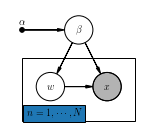

In [30]:
# Instantiate the PGM (probability graph model) object
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3], )

# Add Nodes
## Hierarchical paramters
pgm.add_node(daft.Node("alpha", r"$\alpha$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node("beta", r"$\beta$", 1.5, 2))

## Latent Variable
pgm.add_node(daft.Node("w", r"$w$", 1, 1))

## Data
pgm.add_node(daft.Node("x", r"$x$", 2, 1, observed=True))

# Add Edges
pgm.add_edge("alpha", "beta")
pgm.add_edge("beta", "w")
pgm.add_edge("w", "x")
pgm.add_edge("beta", "x")

# Add a plate
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1], label=r"$n = 1, \cdots, N$", shift=-0.1))

# Render
pgm.render()
pgm.figure.savefig("classic.png", dpi=150)

I don't love that you don't have access to the underlying figure and ax objects.  This makes it hard to modify basic properties of the figure, like the background color or the size of the figure. 

# Generative Definition

However, since we're just calling methods we can loop in all the ways we might want. This hints at how we might move a graph in daft procedurally into other protocols. 

adding r010000
adding r020000
adding r030000
adding r040000
adding r0100.5
adding r020.25
adding r030.125
adding r040.0625
adding r010001
adding r0200.5
adding r030.25
adding r040.125
adding r0101.5
adding r020.75
adding r030.375
adding r040.1875
adding r010002
adding r020001
adding r0300.5
adding r040.25
adding r0102.5
adding r021.25
adding r030.625
adding r040.3125
adding r010003
adding r0201.5
adding r030.75
adding r040.375
adding r0103.5
adding r021.75
adding r030.875
adding r040.4375


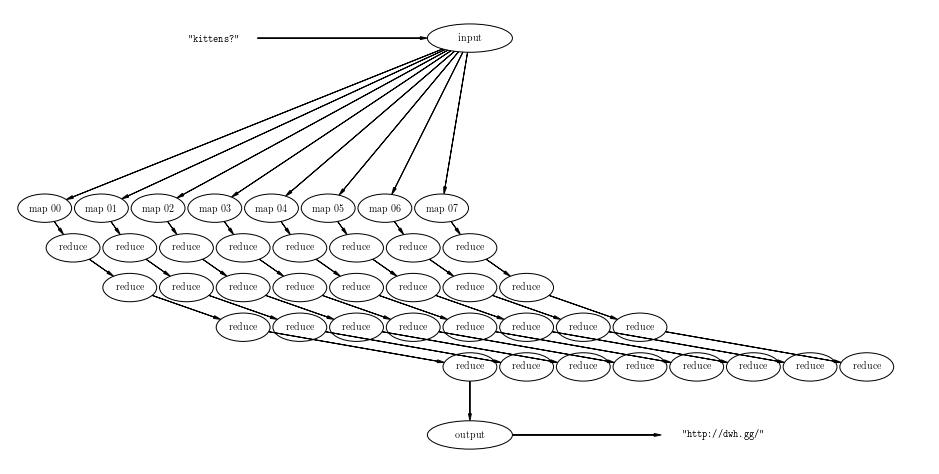

In [35]:
def recurse(pgm, nodename, level, c):
    if level > 4:
        return nodename
    r = c / 2
    r1nodename = "r{0:02n}{1:04n}".format(level, r)
    if 2 * r == c:
        print("adding {0}".format(r1nodename))
        pgm.add_node(daft.Node(r1nodename, r"reduce",
                               2 ** level * (r + 0.5) - 0.5,
                               3 - 0.7 * level, aspect=1.9))
    pgm.add_edge(nodename, r1nodename)
    if 2 * r == c:
        return recurse(pgm, r1nodename, level + 1, r)

pgm = daft.PGM([16.2, 8], origin=[-0.6, -1.5])

pgm.add_node(daft.Node("query", r'\texttt{"kittens?"}', 3, 6., aspect=3.,
                       plot_params={"ec": "none"}))
pgm.add_node(daft.Node("input", r"input", 7.5, 6., aspect=3.))
pgm.add_edge("query", "input")

for c in range(8):
    nodename = "map {0:02d}".format(c)
    pgm.add_node(daft.Node(nodename, str(nodename), c, 3., aspect=1.9))
    pgm.add_edge("input", nodename)
    level = 1
    recurse(pgm, nodename, level, c)

pgm.add_node(daft.Node("output", r"output", 7.5, -1., aspect=3.))
pgm.add_edge("r040000", "output")
pgm.add_node(daft.Node("answer", r'\texttt{"http://dwh.gg/"}', 12., -1.,
                       aspect=4.5, plot_params={"ec": "none"}))
pgm.add_edge("output", "answer")

pgm.render()
pgm.figure.savefig("recursive.pdf")
pgm.figure.savefig("recursive.png", dpi=200)

So let's introduce an example more specific to City Year.  I call it:

# The City Year Causal Theory of Change

We're starting small here.  Most nodes in this first iteration would actually be expanded into multiple nodes.

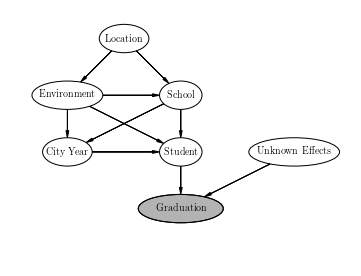

In [105]:
pgm = daft.PGM([6, 4.5], origin=[0., 0.])

# Nodes
pgm.add_node(daft.Node("location", r"Location", 2, 4, aspect=1.75))

pgm.add_node(daft.Node("environment", r"Environment", 1, 3, aspect=2.5))
pgm.add_node(daft.Node("school", r"School", 3, 3, aspect=1.5))

pgm.add_node(daft.Node("cityyear", r"City Year", 1, 2, aspect=1.75))
pgm.add_node(daft.Node("student", r"Student", 3, 2, aspect=1.5))

pgm.add_node(daft.Node("unknown", r"Unknown Effects", 5, 2, aspect=3.2))

pgm.add_node(daft.Node("grad", r"Graduation", 3, 1, aspect=3, observed=True))

# Edges
pgm.add_edge("location", "environment")
pgm.add_edge("location", "school")
pgm.add_edge("environment", "school")
pgm.add_edge("environment", "student")
pgm.add_edge("environment", "cityyear")
pgm.add_edge("school", "student")
pgm.add_edge("school", "cityyear")
pgm.add_edge("student", "grad")
pgm.add_edge("cityyear", "student")
pgm.add_edge("unknown", "grad")

# Render & Save
pgm.render()
pgm.figure.savefig("CY Casual Theory of Change.png", dpi=200)